<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import folium
import numpy as np
import matplotlib as mpl
from folium.plugins import MarkerCluster
import json
import fiona 

In [4]:
df=pd.read_csv('MORA_alerts.csv', encoding="ISO-8859-1")
df.head()

C:\Users\Meredith.Raymer\Anaconda3\envs\geo-env\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,alert_char_crc,alert_uuid,uuid_version,current_flag,elt_run_id,total_occurences,alert_type,sub_type,street,...,report_description,location_lat,location_lon,jam_uuid,start_pub_millis,start_pub_utc_timestamp,pub_millis,pub_utc_timestamp,pub_utc_epoch_week,road_type
0,1,c962717c,aac6254f-54ed-34f6-8064-98b8ba3476ac,1,1,1533940866,7581,ROAD_CLOSED,ROAD_CLOSED_EVENT,SR-410,...,NaN,46.873797,-121.516243,NaN,1488718428799,2017-03-05 12:53:48,1488718428799,2017-03-05 12:53:48,9,NaN
1,2,e3a0ec27,6eb4e413-ff51-3604-8389-6e4c22685eed,1,1,1533940866,7581,ROAD_CLOSED,ROAD_CLOSED_EVENT,SR-410,...,NaN,46.869337,-121.520425,NaN,1488718428002,2017-03-05 12:53:48,1488718428002,2017-03-05 12:53:48,9,NaN
2,3,f17a86f0,9ec60704-e1ca-398f-a7d8-a103c4cceea5,1,1,1533940866,7581,ROAD_CLOSED,ROAD_CLOSED_EVENT,SR-410,...,NaN,46.910272,-121.413547,NaN,1488718436952,2017-03-05 12:53:56,1488718436952,2017-03-05 12:53:56,9,NaN
3,4,609758aa,7e7f46e2-1214-33ec-85ed-b9ab8e8ed6d2,1,1,1533940866,7581,ROAD_CLOSED,ROAD_CLOSED_EVENT,SR-410,...,NaN,46.876921,-121.516890,NaN,1488718442031,2017-03-05 12:54:02,1488718442031,2017-03-05 12:54:02,9,NaN
4,5,9926b639,087717b9-255e-3be3-aba9-75689a44dfa3,1,1,1533940866,7581,ROAD_CLOSED,ROAD_CLOSED_EVENT,SR-410,...,NaN,46.914910,-121.384891,NaN,1488718447905,2017-03-05 12:54:07,1488718447905,2017-03-05 12:54:07,9,NaN


In [3]:
# WAZE data column names
list(df.columns.values)

['Unnamed: 0',
 'alert_char_crc',
 'alert_uuid',
 'uuid_version',
 'current_flag',
 'elt_run_id',
 'total_occurences',
 'alert_type',
 'sub_type',
 'street',
 'city',
 'state',
 'country',
 'num_thumbsup',
 'reliability',
 'confidence',
 'report_rating',
 'magvar',
 'report_description',
 'location_lat',
 'location_lon',
 'jam_uuid',
 'start_pub_millis',
 'start_pub_utc_timestamp',
 'pub_millis',
 'pub_utc_timestamp',
 'pub_utc_epoch_week',
 'road_type']

In [5]:
import geopandas as gpd

In [6]:
#opening entrances shapefile
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
entrances = gpd.read_file('MORA Park Entrances.kml', driver='KML')

In [7]:
from shapely.geometry import Point

In [8]:
#converting WAZE data fram into GeoDataFrame with geometry point 
alertPoints = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.location_lon, df.location_lat),crs={'init' :'epsg:4326'})

C:\Users\Meredith.Raymer\Anaconda3\envs\geo-env\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [10]:
alertPoints=alertPoints.to_crs(epsg=4326)

<AxesSubplot:>

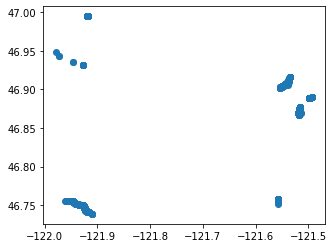

In [11]:
#clipping WAZE points to those within the entrance
MORAalerts=gpd.clip(alertPoints,entrances)
MORAalerts.plot()

In [12]:
MORAalerts.street.value_counts()

SR-410                                                  44079
SR-706                                                    687
Stevens Canyon Rd                                         141
White River Rd                                            109
Sunrise Park Rd                                           108
SR-123                                                     42
Fairfax Forest Reserve Rd E                                36
SR-165                                                     24
Westside Rd                                                11
Mount Rainier National Park: Nisqually Entrance             9
Mount Rainier National Park: Stevens Canyon Entrance        2
Name: street, dtype: int64

In [13]:
alerts_with_entrance=gpd.sjoin(MORAalerts,entrances,how="inner", op='intersects')
alerts_with_entrance.head()

,Unnamed: 0,alert_char_crc,alert_uuid,uuid_version,current_flag,elt_run_id,total_occurences,alert_type,sub_type,street,...,start_pub_millis,start_pub_utc_timestamp,pub_millis,pub_utc_timestamp,pub_utc_epoch_week,road_type,geometry,index_right,Name,Description
0,1,c962717c,aac6254f-54ed-34f6-8064-98b8ba3476ac,1,1,1533940866,7581,ROAD_CLOSED,ROAD_CLOSED_EVENT,SR-410,...,1488718428799,2017-03-05 12:53:48,1488718428799,2017-03-05 12:53:48,9,NaN,POINT (-121.51624 46.87380),2,Cayuse Pass,
1,2,e3a0ec27,6eb4e413-ff51-3604-8389-6e4c22685eed,1,1,1533940866,7581,ROAD_CLOSED,ROAD_CLOSED_EVENT,SR-410,...,1488718428002,2017-03-05 12:53:48,1488718428002,2017-03-05 12:53:48,9,NaN,POINT (-121.52043 46.86934),2,Cayuse Pass,
3,4,609758aa,7e7f46e2-1214-33ec-85ed-b9ab8e8ed6d2,1,1,1533940866,7581,ROAD_CLOSED,ROAD_CLOSED_EVENT,SR-410,...,1488718442031,2017-03-05 12:54:02,1488718442031,2017-03-05 12:54:02,9,NaN,POINT (-121.51689 46.87692),2,Cayuse Pass,
26,27,729865ab,35d73053-cdec-35eb-9f04-fbb646a2de4d,1,1,1533940866,7581,ROAD_CLOSED,ROAD_CLOSED_EVENT,SR-410,...,1488718400997,2017-03-05 12:53:20,1488718400997,2017-03-05 12:53:20,9,NaN,POINT (-121.51689 46.87692),2,Cayuse Pass,
78,79,2d63f2a2,e5731285-5a61-37ee-8b0d-a8420bdca105,1,1,1533940866,7581,ROAD_CLOSED,ROAD_CLOSED_EVENT,SR-410,...,1488718400804,2017-03-05 12:53:20,1488718400804,2017-03-05 12:53:20,9,NaN,POINT (-121.51716 46.87478),2,Cayuse Pass,


In [14]:
alerts_with_entrance.Name.value_counts()

Cayuse Pass              41656
SR-410 and Sunrise Rd     2644
Nisqually                  707
Stevens Canyon             185
Carbon River                36
Mowich Lake                 24
Name: Name, dtype: int64

How to figure out which direction alerts are in? Does it matter though? Couldn't someone tag an alert for an opposing direction incident? 

In [15]:
df_ent_grouped=alerts_with_entrance.groupby(['Name']).count()
df_ent_grouped=df_ent_grouped.reset_index()
df_ent_grouped=df_ent_grouped[['Name','alert_char_crc']].sort_values(by='Name')
df_ent_grouped

,Name,alert_char_crc
0,Carbon River,36
1,Cayuse Pass,41656
2,Mowich Lake,24
3,Nisqually,707
4,SR-410 and Sunrise Rd,2644
5,Stevens Canyon,185


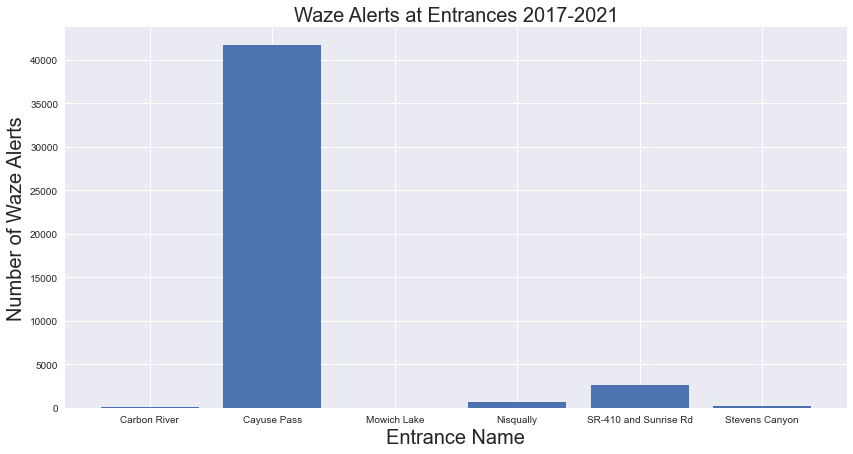

In [16]:
import matplotlib.ticker as ticker
plt.style.use('seaborn')

tick_spacing = 3 
fig,ax = plt.subplots(1,1, figsize=(14, 7))
ax.bar(df_ent_grouped.Name, df_ent_grouped.alert_char_crc, linewidth=4)
ax.set_title('Waze Alerts at Entrances 2017-2021', fontsize=20)

ax.set_xlabel('Entrance Name', fontsize=20)
ax.set_ylabel('Number of Waze Alerts', fontsize=20)
# ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
# ax.tick_params(axis='x', which ='major', labelsize=16)
# ax.tick_params(axis='y', which ='major', labelsize=16)
# ax.tick_params(axis='both', which ='minor', labelsize=16)
ax.grid('off')

plt.show()

Goals for tomorrow:
    Xevaluate entrance shapefiles/redo 
    Xseparate entrance graphs by alert type
    tie entrance graphs to entrance percent counts 
    total park alerts segmented by alert quality with season = table 
    total park alerts segmented by alert quality = graph 
    total alerts by day of week and season = table 
    *how to estimate percent of waze users vs. total park users == market penetration & probability model?
    *time varying heat map/measuring perturbations/traffic flow 
    create cleaned file/presentation

In [17]:
df_ent_grouped.head()

,Name,alert_char_crc
0,Carbon River,36
1,Cayuse Pass,41656
2,Mowich Lake,24
3,Nisqually,707
4,SR-410 and Sunrise Rd,2644


In [18]:
df_street_grouped=alerts_with_entrance.groupby(['street']).count()
df_street_grouped=df_street_grouped.reset_index()
df_street_grouped=df_street_grouped[['street','alert_char_crc']].sort_values(by='street')
df_street_grouped

,street,alert_char_crc
0,Fairfax Forest Reserve Rd E,36
1,Mount Rainier National Park: Nisqually Entrance,9
2,Mount Rainier National Park: Stevens Canyon En...,2
3,SR-123,42
4,SR-165,24
5,SR-410,44079
6,SR-706,687
7,Stevens Canyon Rd,141
8,Sunrise Park Rd,108
9,Westside Rd,11


In [19]:
alerts_with_entrance.alert_type.value_counts()

ROAD_CLOSED      44434
JAM                796
WEATHERHAZARD       22
Name: alert_type, dtype: int64

In [20]:
alerts_with_entrance.sub_type.value_counts()

ROAD_CLOSED_EVENT                 44434
JAM_STAND_STILL_TRAFFIC             567
JAM_HEAVY_TRAFFIC                   149
JAM_MODERATE_TRAFFIC                 25
HAZARD_ON_SHOULDER_CAR_STOPPED       10
HAZARD_ON_ROAD_CONSTRUCTION           9
HAZARD_ON_SHOULDER_ANIMALS            1
HAZARD_ON_ROAD_CAR_STOPPED            1
HAZARD_ON_ROAD_OBJECT                 1
Name: sub_type, dtype: int64

In [21]:
df_accidents = alerts_with_entrance.loc[df['alert_type']=='ACCIDENT']
df_accidents = df_accidents.reset_index()
df_jams = alerts_with_entrance.loc[df['alert_type']=='JAM']
df_jams = df_jams.reset_index()
df_shoulder = alerts_with_entrance.loc[df['sub_type']=='HAZARD_ON_SHOULDER_CAR_STOPPED']
df_shoulder = df_shoulder.reset_index()


df_accidents.shape, df_jams.shape, df_shoulder.shape

((0, 33), (796, 33), (10, 33))

In [22]:
df1 = pd.DataFrame(alerts_with_entrance)

In [23]:
entrances = ['Cayuse Pass', 'SR-410 and Sunrise Rd', 'Nisqually', 'Stevens Canyon','Carbon River','Mowich Lake']   

entrances_df_jams = pd.DataFrame({'Name':entrances})
#fig, ax = plt.subplots(1,1,figsize=(20,15))

for x in df_jams.sub_type.unique():
    temp_df = df_jams.loc[df_jams['sub_type']==x]
    #temp_df = temp_df.loc[temp_df['month_year'].isin(['2021-04','2021-05'])==False]
    if str(x) =='nan':
        x="No Details Captured"
        temp_df = df_accidents.loc[df_jams['sub_type'].isin(['JAM_MODERATE_TRAFFIC','JAM_HEAVY_TRAFFIC', 'JAM_STAND_STILL_TRAFFIC'])==False]
        

    print(x, ": ", len(temp_df))
    
    temp_df_entrances = temp_df.groupby(['Name']).count()
    temp_df_entrances= temp_df_entrances.reset_index()
#     if x =='JAM_MODERATE_TRAFFIC':
#         new_row = {'index':1000, 'Name':'Cayuse Pass', 'alert_char_crc':0}
#         #append row to the dataframe
#         temp_df_entrances = temp_df_entrances.append(new_row, ignore_index=True)
#         new_row = {'index':1001, 'Name':'SR-410 and Sunrise Rd', 'alert_char_crc':0}
#         #append row to the dataframe
#         temp_df_entrances = temp_df_entrances.append(new_row, ignore_index=True)

#     if x =="No Details Captured":
#         new_row = {'index':1000, 'Name':'Nisqually', 'alert_char_crc':0}
#         #append row to the dataframe
#         temp_df_entrances = temp_df_entrances.append(new_row, ignore_index=True)
#         new_row = {'index':1001, 'Name':'Stevens Canyon', 'alert_char_crc':0}
#         #append row to the dataframe
#         temp_df_entrances = temp_df_entrances.append(new_row, ignore_index=True)


    temp_df_entrances = temp_df_entrances[['Name','alert_char_crc']]
    
    temp_df_entrances['alert_char_crc']=temp_df_entrances['alert_char_crc']
    temp_df_entrances.Name = temp_df_entrances.Name.astype("category")
    temp_df_entrances.Name.cat.set_categories(entrances, inplace=True)
    temp_df_entrances = temp_df_entrances.sort_values('Name')
    temp_df_entrances= temp_df_entrances.reset_index()
    entrances_df_jams[x] =temp_df_entrances[['alert_char_crc']] 
    #ax.plot(months,month_df_alerts[x], label = x, linewidth=4)

entrances_df_jams

JAM_STAND_STILL_TRAFFIC :  567
JAM_HEAVY_TRAFFIC :  149
No Details Captured :  0
JAM_MODERATE_TRAFFIC :  25


,Name,JAM_STAND_STILL_TRAFFIC,JAM_HEAVY_TRAFFIC,No Details Captured,JAM_MODERATE_TRAFFIC
0,Cayuse Pass,108.0,14.0,NaN,4.0
1,SR-410 and Sunrise Rd,459.0,135.0,NaN,21.0
2,Nisqually,NaN,NaN,NaN,NaN
3,Stevens Canyon,NaN,NaN,NaN,NaN
4,Carbon River,NaN,NaN,NaN,NaN
5,Mowich Lake,NaN,NaN,NaN,NaN


In [24]:
entrances_df_jams.fillna(0)

,Name,JAM_STAND_STILL_TRAFFIC,JAM_HEAVY_TRAFFIC,No Details Captured,JAM_MODERATE_TRAFFIC
0,Cayuse Pass,108.0,14.0,0.0,4.0
1,SR-410 and Sunrise Rd,459.0,135.0,0.0,21.0
2,Nisqually,0.0,0.0,0.0,0.0
3,Stevens Canyon,0.0,0.0,0.0,0.0
4,Carbon River,0.0,0.0,0.0,0.0
5,Mowich Lake,0.0,0.0,0.0,0.0


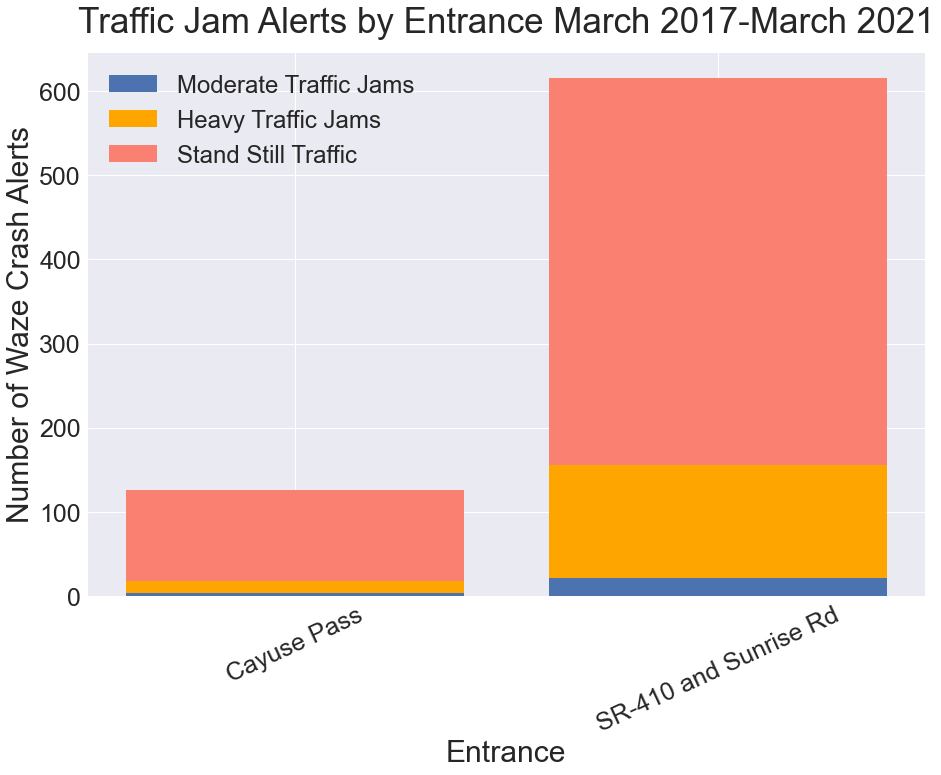

In [25]:
plt.style.use('seaborn')
tick_spacing = 1

entrances = ['Cayuse Pass', 'SR-410 and Sunrise Rd', 'Nisqually', 'Stevens Canyon','Carbon River','Mowich Lake']  

fig, ax = plt.subplots(1,1,figsize=(15,10))
ax.bar(entrances,entrances_df_jams['JAM_MODERATE_TRAFFIC'], label = 'Moderate Traffic Jams', linewidth=1)
ax.bar(entrances,entrances_df_jams['JAM_HEAVY_TRAFFIC'], label = 'Heavy Traffic Jams', 
       bottom = entrances_df_jams['JAM_MODERATE_TRAFFIC'] , linewidth=1, color = 'orange')
ax.bar(entrances,entrances_df_jams['JAM_STAND_STILL_TRAFFIC'], label = 'Stand Still Traffic', 
       bottom = entrances_df_jams['JAM_HEAVY_TRAFFIC']+entrances_df_jams['JAM_MODERATE_TRAFFIC'] , linewidth=1, color = 'salmon')

ax.set_title('Traffic Jam Alerts by Entrance March 2017-March 2021',fontsize= 35, pad = 20) # title of plot

ax.set_xlabel('Entrance',fontsize = 30) #xlabel
ax.set_ylabel('Number of Waze Crash Alerts', fontsize = 30)#ylabel
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.tick_params(axis='x', which='major', labelsize=25,rotation = 25)
ax.tick_params(axis='y', which='major', labelsize=25)
ax.tick_params(axis='both', which='minor', labelsize=8)
ax.grid('on')
plt.legend(fontsize = 24)
plt.show()

Nisqually 1087426
Stevens Canyon 433493
Cayuse Pass 472187
SR-410 and Sunrise Rd 771349
Mowich Lake 553362
Carbon River 111790


In [28]:
nonclosureAlerts = alerts_with_entrance[df.alert_type != 'ROAD_CLOSED']
nonclosureAlerts

C:\Users\Meredith.Raymer\Anaconda3\envs\geo-env\lib\site-packages\geopandas\geodataframe.py:1299: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


,Unnamed: 0,alert_char_crc,alert_uuid,uuid_version,current_flag,elt_run_id,total_occurences,alert_type,sub_type,street,...,start_pub_millis,start_pub_utc_timestamp,pub_millis,pub_utc_timestamp,pub_utc_epoch_week,road_type,geometry,index_right,Name,Description
30821,30822,465ee9f6,2f00dd45-315e-397d-b34c-32714b9aea42,1,1,1533944133,18,WEATHERHAZARD,HAZARD_ON_ROAD_CONSTRUCTION,SR-410,...,1500935640000,2017-07-24 22:34:00,1500935640000,2017-07-24 22:34:00,30,7.0,POINT (-121.51478 46.86921),2,Cayuse Pass,
379426,379427,9d70d478,af5d3008-2ab3-3452-9909-ef93e8bca7e8,1,1,1533944133,18,WEATHERHAZARD,HAZARD_ON_ROAD_CONSTRUCTION,SR-410,...,1500935640000,2017-07-24 22:34:00,1500935640000,2017-07-24 22:34:00,30,7.0,POINT (-121.51478 46.86921),2,Cayuse Pass,
17827,17828,ef028773,856f92fd-143d-3c06-8f57-2accd2ef55d9,1,1,1533944133,6,JAM,JAM_STAND_STILL_TRAFFIC,Sunrise Park Rd,...,1499027195351,2017-07-02 20:26:35,1499027195351,2017-07-02 20:26:35,26,1.0,POINT (-121.54898 46.90406),3,SR-410 and Sunrise Rd,
18089,18090,2b2d757a,e397fa97-1a22-3fc4-a6f9-945a800e1639,1,1,1533944133,6,JAM,JAM_STAND_STILL_TRAFFIC,Sunrise Park Rd,...,1499104996771,2017-07-03 18:03:16,1499104996771,2017-07-03 18:03:16,27,1.0,POINT (-121.55013 46.90357),3,SR-410 and Sunrise Rd,
20220,20221,71fe91d9,e387dec6-343d-32ed-8e74-16bba459073e,1,1,1533944970,6,JAM,JAM_STAND_STILL_TRAFFIC,Sunrise Park Rd,...,1503256432912,2017-08-20 19:13:52,1503256432912,2017-08-20 19:13:52,33,1.0,POINT (-121.54981 46.90371),3,SR-410 and Sunrise Rd,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627372,627373,2261b310,95387fd7-f8db-4702-9e5c-401f9d456dec,1,1,1597509548,7,JAM,JAM_STAND_STILL_TRAFFIC,SR-706,...,1597510429000,2020-08-15 16:53:49,1597510429000,2020-08-15 16:53:49,32,7.0,POINT (-121.92870 46.74970),0,Nisqually,
628483,628484,6cfc1ffa,4000e866-9a54-4e4a-a730-bb498880d039,1,0,1597615749,10,JAM,JAM_STAND_STILL_TRAFFIC,SR-706,...,1597616267000,2020-08-16 22:17:47,1597616267000,2020-08-16 22:17:47,32,7.0,POINT (-121.92611 46.74844),0,Nisqually,
628484,628485,c5506b35,4000e866-9a54-4e4a-a730-bb498880d039,2,1,1597615749,1,JAM,JAM_STAND_STILL_TRAFFIC,SR-706,...,1597616267000,2020-08-16 22:17:47,1597616267000,2020-08-16 22:17:47,32,7.0,POINT (-121.92611 46.74844),0,Nisqually,
651227,651228,7f662c74,3813524a-025f-4bfe-9f82-6e1dedd20300,1,0,1611433173,1,JAM,JAM_STAND_STILL_TRAFFIC,SR-706,...,1611434493000,2021-01-23 20:41:33,1611434493000,2021-01-23 20:41:33,3,7.0,POINT (-121.93606 46.75089),0,Nisqually,


In [29]:
d = {'Name': ['Nisqually','Stevens Canyon','Cayuse Pass','SR-410 and Sunrise Rd','Mowich Lake','Carbon River'], 'Counts': [1087426, 433493, 472187, 771349, 553362, 111790]}
IRMA = pd.DataFrame(data=d)

In [30]:
IRMA.head()

,Name,Counts
0,Nisqually,1087426
1,Stevens Canyon,433493
2,Cayuse Pass,472187
3,SR-410 and Sunrise Rd,771349
4,Mowich Lake,553362


In [31]:
df_ent_grouped

,Name,alert_char_crc
0,Carbon River,36
1,Cayuse Pass,41656
2,Mowich Lake,24
3,Nisqually,707
4,SR-410 and Sunrise Rd,2644
5,Stevens Canyon,185


In [38]:
wazeIrma=df_ent_grouped.join(IRMA.set_index('Name'), on='Name')
wazeIrma
#remove/edit to road closures 
#add in percents of all waze alerts vs. visitor counts 
#under/over represented 
#z-test 
#road closures by month 

,Name,alert_char_crc,Counts
0,Carbon River,36,111790
1,Cayuse Pass,41656,472187
2,Mowich Lake,24,553362
3,Nisqually,707,1087426
4,SR-410 and Sunrise Rd,2644,771349
5,Stevens Canyon,185,433493
